In [19]:
import numpy as np
import time
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [42]:
def bruteforce(x, y):
    vector = np.arange(1, x+1)
    while len(vector[vector!=0])>1:
        for i in np.arange(len(vector)-1):
            if vector[i] != 0:
                for j in np.arange(y-1, len(vector), y):
                    if vector[j] != 0:
                        vector[j] = 0
                        break
        if vector[-1] != 0:
            vector[0] = 0
        vector = vector[vector>0]
    return int(vector[0])


def coprimes(x):
    prepow = np.power(2, np.floor(np.log(x)/np.log(2)))
    nextpow = np.power(2, np.ceil(np.log(x)/np.log(2)))
    if prepow == nextpow:
        return 1
    else:
        num_people = np.arange(prepow, nextpow)
        survivors = np.array([])

        for j in np.arange(1, nextpow-prepow+1):
            v = 2*j-1
            survivors = np.append(survivors, v)

        return int(survivors[num_people==x])


def recursion(x, y):
    if x == 1:
        return 1
    else:
        return int((recursion(x - 1, y)+y-1)%x + 1)
 
def stack(x, y):
    vector=[]
    for i in range(1,x+1):
        vector.append(i)
    if len(vector) == 1:
        return 1
    else:
        i = 0
        while len(vector) > 1:
            i = (i+y-1)%len(vector)
            vector.pop(i)
        return int(vector[0])

def gensol(x):
    val = x - np.power(2, np.floor(np.log(x)/np.log(2)))
    return int((2*val)+1)

def trick(x):
    win = list(str(bin(x)[2:]))
    win = np.append(win, win[0])
    win = np.delete(win, 0)
    return int(''.join(win), 2)

In [43]:
brute_time = np.array([])
coprime_time = np.array([])
recursion_time = np.array([])
stack_time = np.array([])
gensol_time = np.array([])
trick_time = np.array([])
read_time = np.array([])

readlist = pd.read_csv('solutions.csv', index_col = 0)

n, k = np.arange(1, 900), 2

In [44]:
for i in tqdm(n):
    start = time.time()
    bruteforce(i, k)
    brute_time = np.append(brute_time, time.time()-start)

for i in tqdm(n):
    start = time.time()
    coprimes(i)
    coprime_time = np.append(coprime_time, time.time()-start)

for i in tqdm(n):
    start = time.time()
    recursion(i, k)
    recursion_time = np.append(recursion_time, time.time()-start)
    
for i in tqdm(n):
    start = time.time()
    stack(i, k)
    stack_time = np.append(stack_time, time.time()-start)
    
for i in tqdm(n):
    start = time.time()
    gensol(i)
    gensol_time = np.append(gensol_time, time.time()-start)

for i in tqdm(n):
    start = time.time()
    trick(i)
    trick_time = np.append(trick_time, time.time()-start)
    
for i in tqdm(n):
    start = time.time()
    readlist.Solution[i]
    read_time = np.append(read_time, time.time()-start)


100%|██████████| 899/899 [00:00<00:00, 39204.81it/s]


In [50]:
complexity = pd.DataFrame({
    'Brute Force' : brute_time,
    'Coprime Decomposition' : coprime_time,
    'Recursion' : recursion_time,
    'Stack' : stack_time,
    'General Solution' : gensol_time,
    'Binary Trick' : trick_time,
    'Read List' : read_time
                          }, index = n)

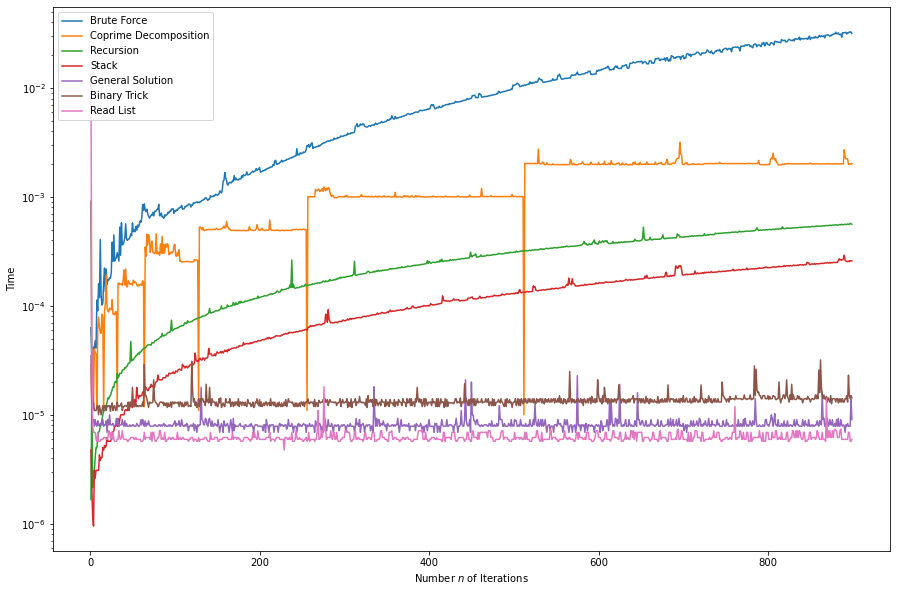

In [51]:
complexity.plot(
        kind = 'line',
        # title = 'Time Comparison Between Algorithms',
        xlabel = 'Number $n$ of Iterations',
        ylabel = 'Time',
        figsize = (15,10),
        logy = True
        )

plt.show()